In [1]:
# !pip install pyimkernel

In [2]:
# !pip show pyimkernel

In [3]:
import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pyimkernel import ApplyKernels
import os 

In [4]:
X_train, X_test, y_train, y_test = mnist.train_images(), mnist.test_images(), mnist.train_labels(), mnist.test_labels()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
imkernel = ApplyKernels(random_seed=0)

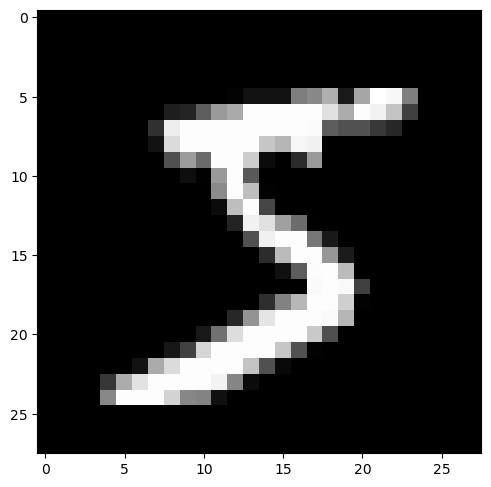

In [8]:
imkernel.imshow(image=X_train[0], cmap=plt.cm.gray)

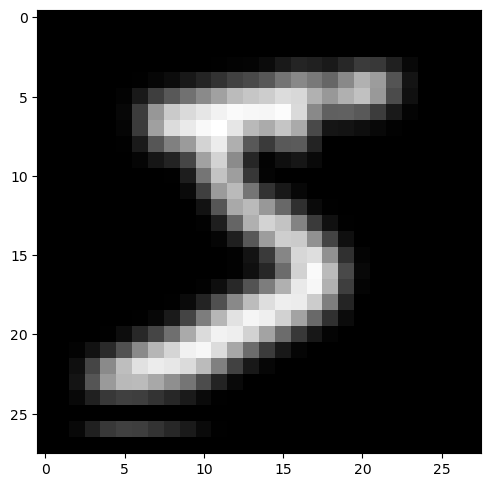

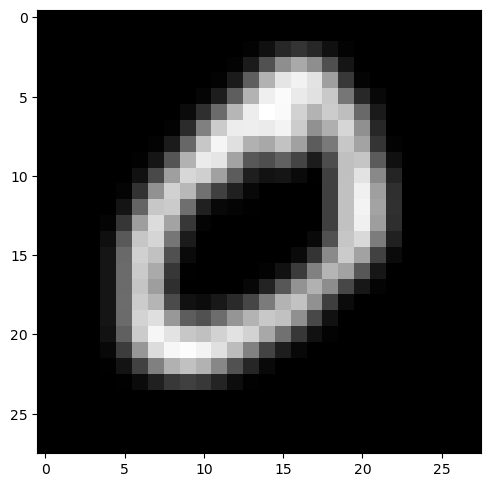

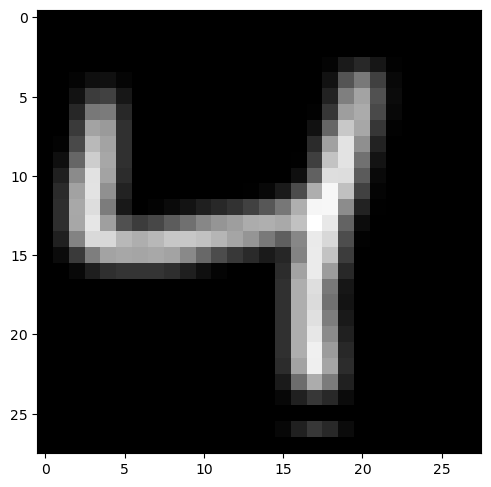

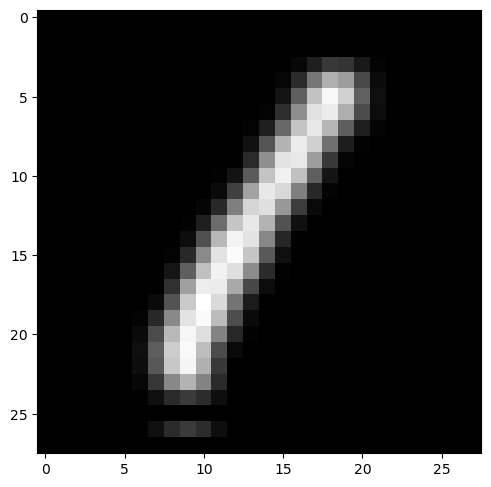

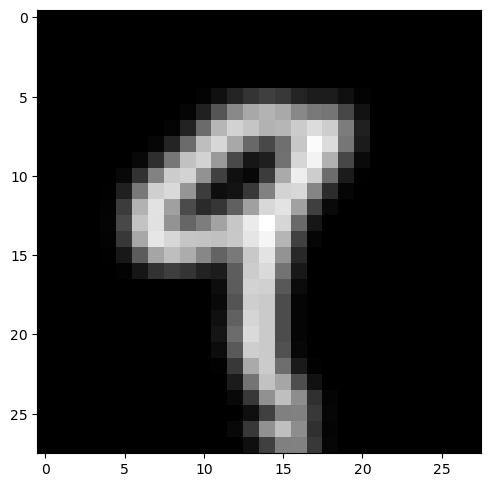

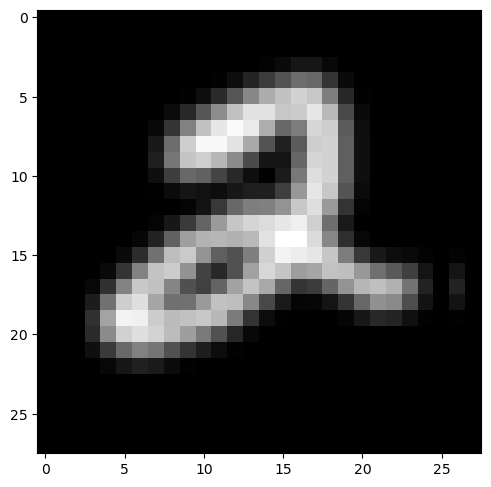

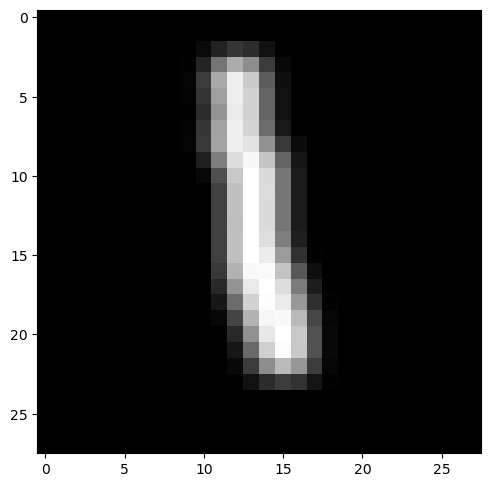

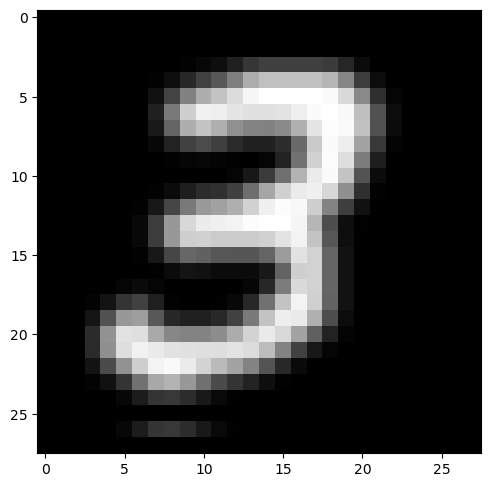

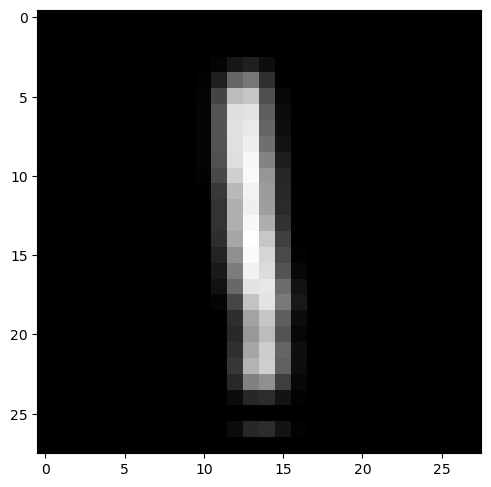

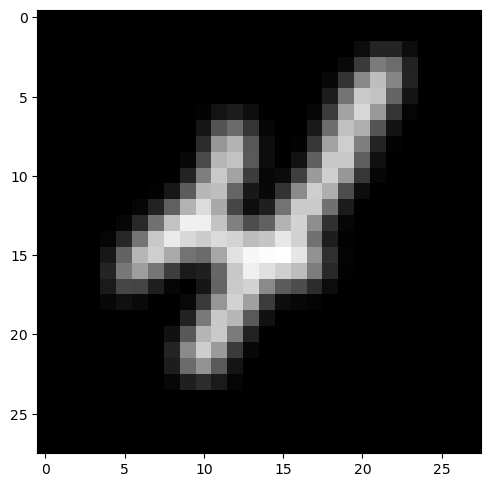

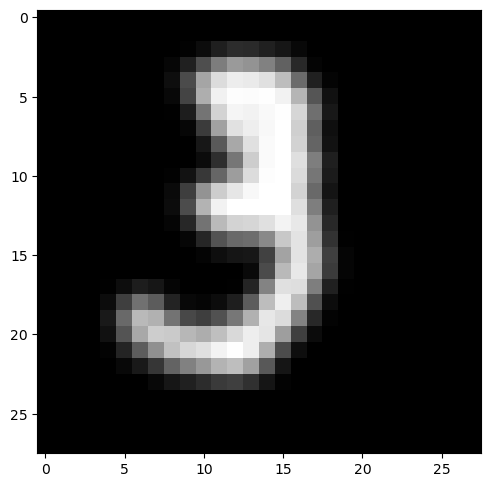

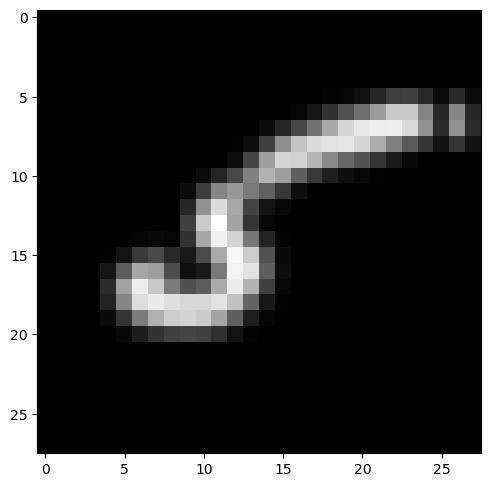

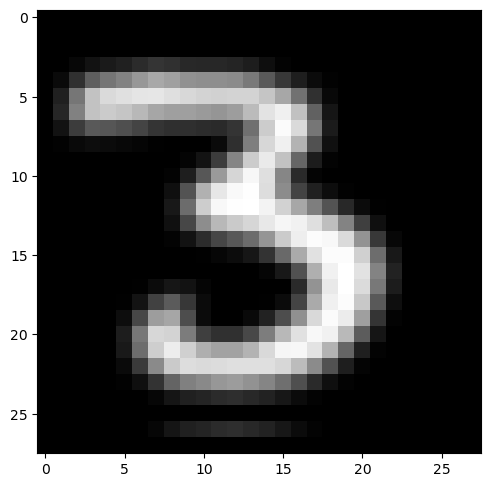

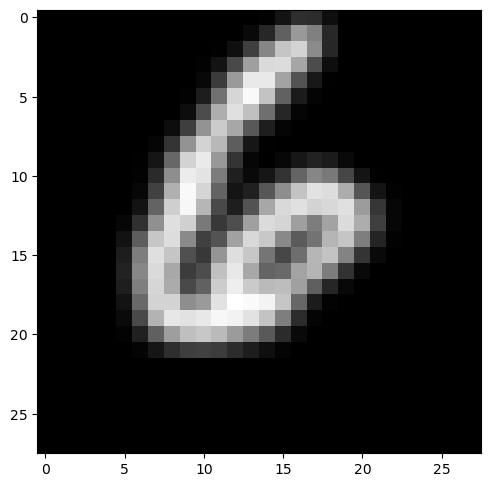

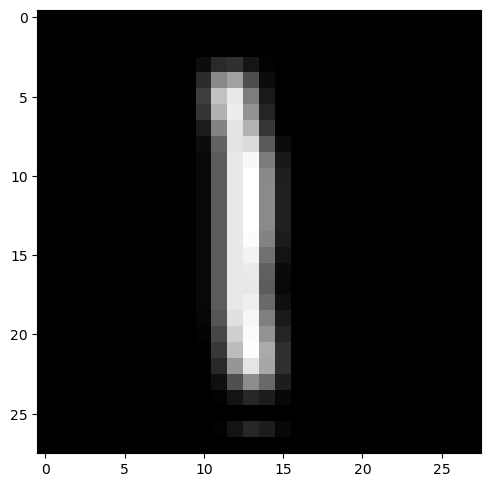

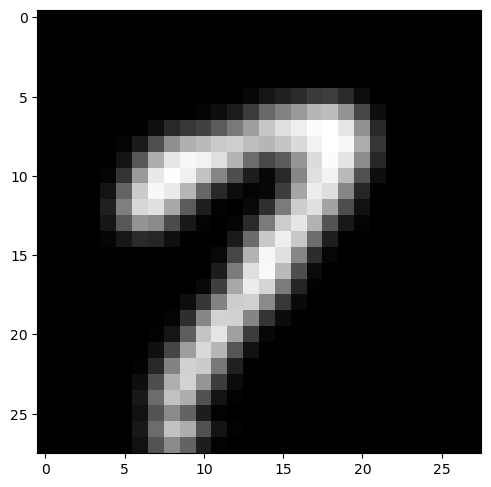

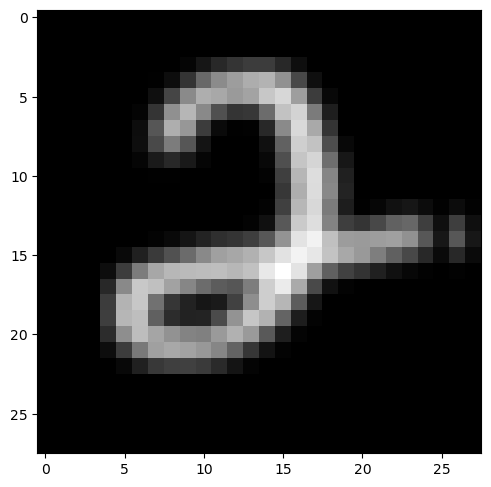

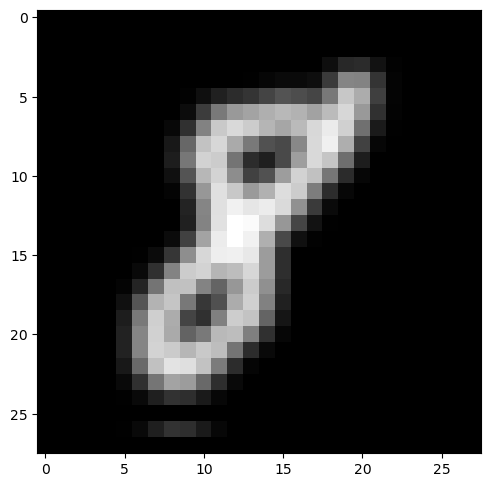

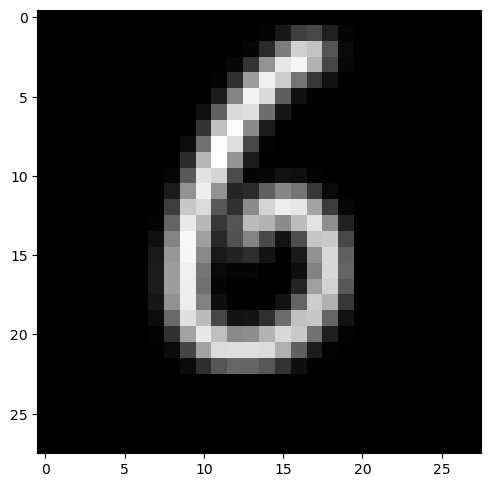

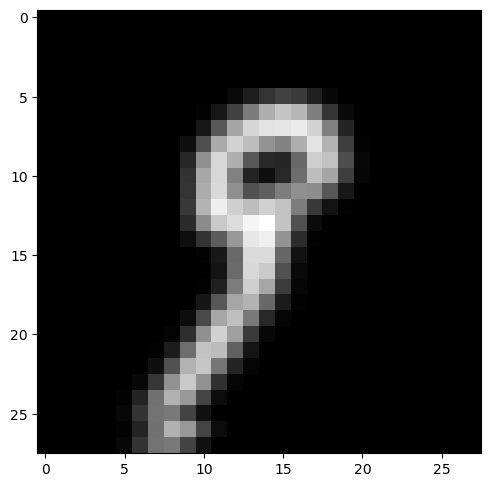

In [9]:
for i in range(20):
    imkernel.imshow(image=imkernel.apply_filter_on_gray_img(X_train[i], kernel_name='blur'),
                    cmap=plt.cm.gray)

In [10]:
image1 = cv2.imread(os.path.join('Images', '1.jpg'))

In [11]:
image1.shape

(499, 635, 3)

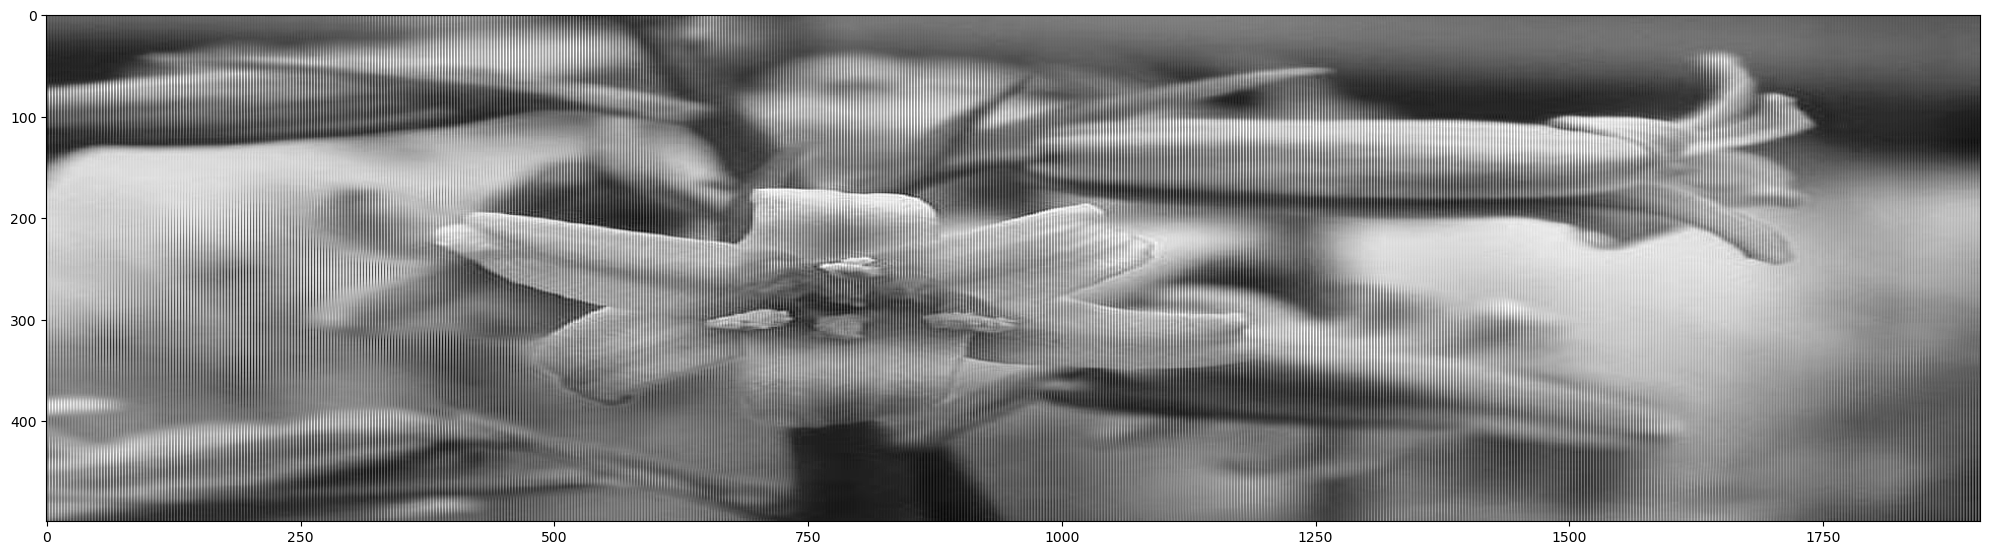

In [12]:
imkernel.imshow(image1.reshape(image1.shape[0], -1), cmap='gray', figsize=(20, 10))

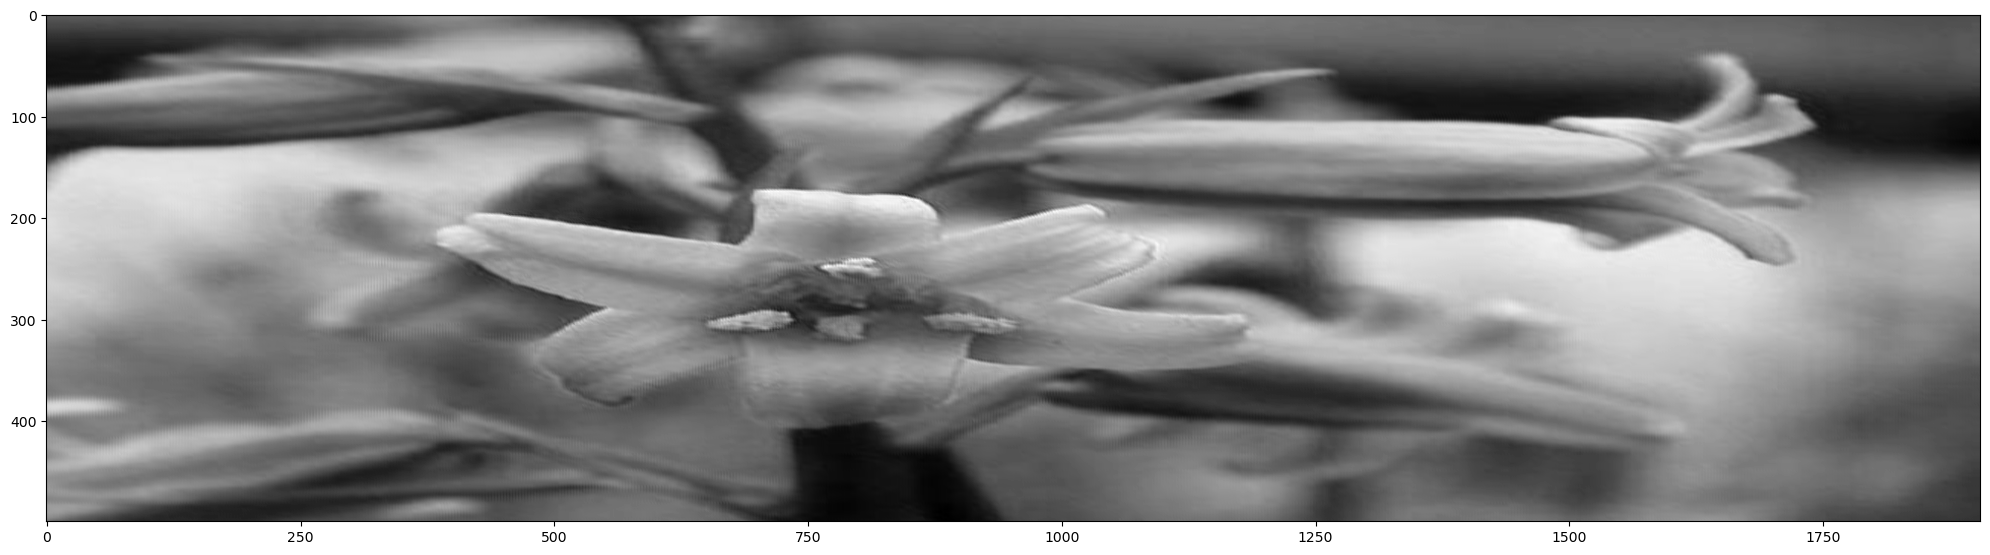

In [13]:
imkernel.imshow(image=imkernel.apply_filter_on_color_img(image1, kernel_name='motion blur', with_resize=False),
                figsize=(20, 10), cmap=plt.cm.gray)

In [14]:
blurred_image = imkernel.apply_filter_on_color_img(image1, kernel_name='motion blur', with_resize=True)

In [15]:
blurred_image.shape # a grayscale image

(400, 400)

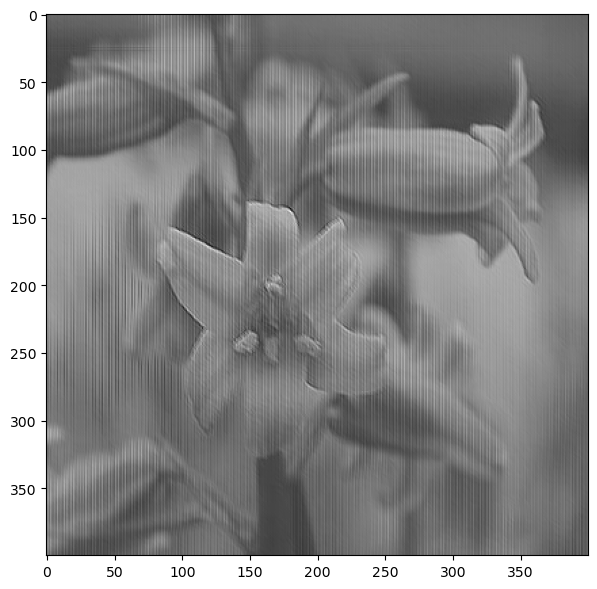

In [16]:
imkernel.imshow(image=imkernel.apply_filter_on_gray_img(blurred_image, kernel_name='sharpen'),
                figsize=(7, 6), cmap=plt.cm.gray)